In [1]:
import pandas as pd 
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("catA_train.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

# Exploratory Data Analysis

In [3]:
df.isna().sum() # Missing Values

LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [4]:
df.describe()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000


In [5]:
columns_to_drop = ['LATITUDE', 'LONGITUDE','AccountID', 'Company','Industry','8-Digit SIC Code','8-Digit SIC Description','Entity Type','Parent Company','Parent Country','Company Description','Square Footage','Company Status (Active/Inactive)','Fiscal Year End','Global Ultimate Company','Global Ultimate Country','Domestic Ultimate Company']
df2 = df.drop(columns=columns_to_drop)

In [6]:
df2 = df2.dropna(subset=["Year Found"])

In [7]:
df2 = pd.get_dummies(df2, columns=['Ownership Type'], prefix='Ownership Type')

In [8]:
category_ownership = {'Ownership Type_Non-Corporates': ['0', '1']}
category_breakdown = df2['Ownership Type_Non-Corporates'].value_counts()
# Display the breakdown
print("\nBreakdown of unique values in the 'Ownership Type_Non-Corporates' column:")
print(category_breakdown)

category_ownership = {'Ownership Type_Nonprofit': ['0', '1']}
category_breakdown = df2['Ownership Type_Nonprofit'].value_counts()
# Display the breakdown
print("\nBreakdown of unique values in the 'Ownership Type_Nonprofit' column:")
print(category_breakdown)

category_ownership = {'Ownership Type_Partnership': ['0', '1']}
category_breakdown = df2['Ownership Type_Partnership'].value_counts()
# Display the breakdown
print("\nBreakdown of unique values in the 'Ownership Type_Partnership' column:")
print(category_breakdown)

category_ownership = {'Ownership Type_Private': ['0', '1']}
category_breakdown = df2['Ownership Type_Private'].value_counts()
# Display the breakdown
print("\nBreakdown of unique values in the 'Ownership Type_Private' column:")
print(category_breakdown)

category_ownership = {'Ownership Type_Public': ['0', '1']}
category_breakdown = df2['Ownership Type_Public'].value_counts()
# Display the breakdown
print("\nBreakdown of unique values in the 'Ownership Type_Public' column:")
print(category_breakdown)

category_ownership = {'Ownership Type_Public Sector ': ['0', '1']}
category_breakdown = df2['Ownership Type_Public Sector'].value_counts()
# Display the breakdown
print("\nBreakdown of unique values in the 'Ownership Type_Public Sector :")
print(category_breakdown)


Breakdown of unique values in the 'Ownership Type_Non-Corporates' column:
Ownership Type_Non-Corporates
False    28739
True         9
Name: count, dtype: int64

Breakdown of unique values in the 'Ownership Type_Nonprofit' column:
Ownership Type_Nonprofit
False    28744
True         4
Name: count, dtype: int64

Breakdown of unique values in the 'Ownership Type_Partnership' column:
Ownership Type_Partnership
False    28703
True        45
Name: count, dtype: int64

Breakdown of unique values in the 'Ownership Type_Private' column:
Ownership Type_Private
True     27847
False      901
Name: count, dtype: int64

Breakdown of unique values in the 'Ownership Type_Public' column:
Ownership Type_Public
False    27929
True       819
Name: count, dtype: int64

Breakdown of unique values in the 'Ownership Type_Public Sector :
Ownership Type_Public Sector
False    28724
True        24
Name: count, dtype: int64


In [9]:
columns_to_drop2 = ['Ownership Type_Non-Corporates','Ownership Type_Nonprofit','Ownership Type_Partnership','Ownership Type_Public Sector']
df2 = df2.drop(columns=columns_to_drop2)

In [10]:
df2 = pd.get_dummies(df2, columns=['Import/Export Status'], prefix='Import/Export Status')

In [11]:
grouped_global = df2.groupby(by = "Is Global Ultimate")
index_global_1 = grouped_global.groups[1]

In [12]:
df2.loc[df2.index.isin(index_global_1), 'Is Domestic Ultimate'] = 0


In [13]:
value_counts = df2['SIC Code'].value_counts()
print(value_counts)
#top three largest SIC groupings 
#6719 --> holding companies
#8742 --> management consulting services 
#7371 --> computer programming services 

SIC Code
6719.0    7660
8742.0    1380
7371.0     777
4731.0     732
7389.0     676
          ... 
3011.0       2
5945.0       2
3845.0       2
1761.0       1
9211.0       1
Name: count, Length: 582, dtype: int64


In [14]:
# Find the frequency of each industry
sic_code_frequency = df2['SIC Code'].value_counts()

# Set a threshold for low-frequency SIC Codes
threshold = 10  # Adjust this threshold based on your preference

# Identify SIC Codes with frequency below the threshold
low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index

# Replace these low-frequency SIC Codes with a common label "Others"
df2['SIC Code'] = df2['SIC Code'].replace(low_frequency_sic_codes, 'Others')

sic_code_frequency1 = df2['SIC Code'].value_counts()

# convert to str cus we dont want it to be trained as a numeric value
df2['SIC Code'] = df2['SIC Code'].astype(str)

In [ ]:
#Label encode SIC code
label_encoder = LabelEncoder()
df5 = df2.copy()
df2['SIC Code'] = label_encoder.fit_transform(df2['SIC Code'])
df2["SIC Code"].unique()
df6 = df2.copy()

In [16]:

df2['Ownership Type_Private'] = np.where(df2['Ownership Type_Private'] == True, 1, 0)
df2['Ownership Type_Public'] = np.where(df2['Ownership Type_Public'] == True, 1, 0)
df2['Import/Export Status_Both Imports & Exports'] = np.where(df2['Import/Export Status_Both Imports & Exports'] == True, 1, 0)
df2['Import/Export Status_Exports'] = np.where(df2['Import/Export Status_Exports'] == True, 1, 0)
df2['Import/Export Status_Imports'] = np.where(df2['Import/Export Status_Imports'] == True, 1, 0)

In [17]:
correlation_year = df2[['Year Found', 'Sales (Domestic Ultimate Total USD)']].corr()
correlation_Employees_S = df2[['Employees (Single Site)', 'Sales (Domestic Ultimate Total USD)']].corr()
correlation_Employees_D = df2[['Employees (Domestic Ultimate Total)', 'Sales (Domestic Ultimate Total USD)']].corr()
correlation_Employees_G = df2[['Employees (Global Ultimate Total)', 'Sales (Domestic Ultimate Total USD)']].corr()
correlation_Sales_Global = df2[['Sales (Global Ultimate Total USD)', 'Sales (Domestic Ultimate Total USD)']].corr()

print(correlation_year)
print(correlation_Employees_S)
print(correlation_Employees_D)
print(correlation_Employees_G)
print(correlation_Sales_Global)
# since dropping null values for single and global employees is insignificant, leaving it in


                                     Year Found  \
Year Found                             1.000000   
Sales (Domestic Ultimate Total USD)    0.014523   

                                     Sales (Domestic Ultimate Total USD)  
Year Found                                                      0.014523  
Sales (Domestic Ultimate Total USD)                             1.000000  
                                     Employees (Single Site)  \
Employees (Single Site)                             1.000000   
Sales (Domestic Ultimate Total USD)                 0.003351   

                                     Sales (Domestic Ultimate Total USD)  
Employees (Single Site)                                         0.003351  
Sales (Domestic Ultimate Total USD)                             1.000000  
                                     Employees (Domestic Ultimate Total)  \
Employees (Domestic Ultimate Total)                             1.000000   
Sales (Domestic Ultimate Total USD)                

In [18]:
columns_to_drop3 = ['Employees (Single Site)', 'Employees (Global Ultimate Total)']
df2 = df2.drop(columns=columns_to_drop3)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28748 entries, 0 to 29181
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SIC Code                                     28748 non-null  int64  
 1   Year Found                                   28748 non-null  float64
 2   Employees (Domestic Ultimate Total)          28673 non-null  float64
 3   Sales (Domestic Ultimate Total USD)          28748 non-null  float64
 4   Sales (Global Ultimate Total USD)            28748 non-null  float64
 5   Is Domestic Ultimate                         28748 non-null  float64
 6   Is Global Ultimate                           28748 non-null  float64
 7   Ownership Type_Private                       28748 non-null  int64  
 8   Ownership Type_Public                        28748 non-null  int64  
 9   Import/Export Status_Both Imports & Exports  28748 non-null  int64  
 10  Imp

In [19]:
category_means = df2.groupby('SIC Code')['Sales (Domestic Ultimate Total USD)'].mean()
standard_deviation = category_means.std()
print("Sd:", standard_deviation)
# High sd means significant.

Sd: 863306457.3259745


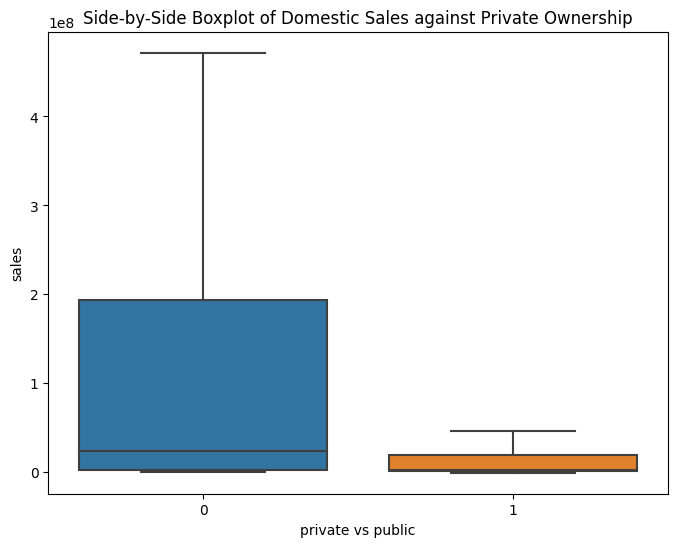

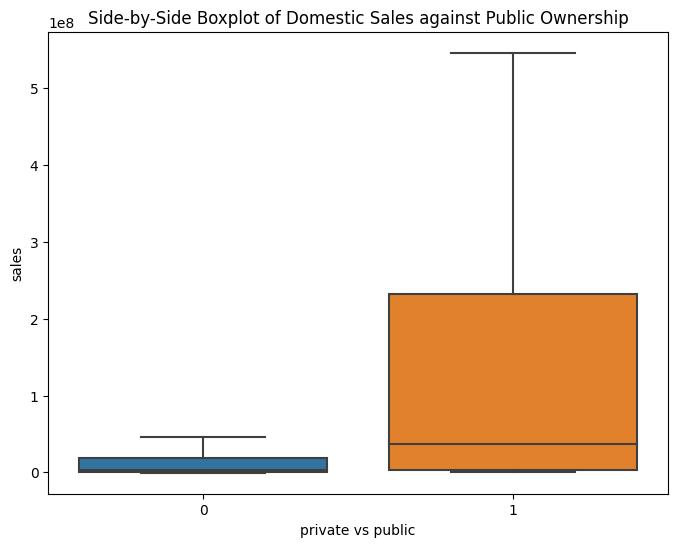

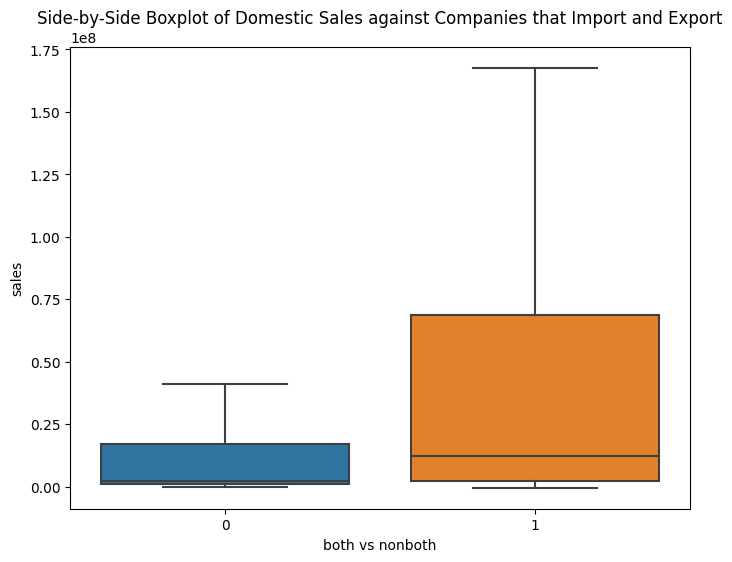

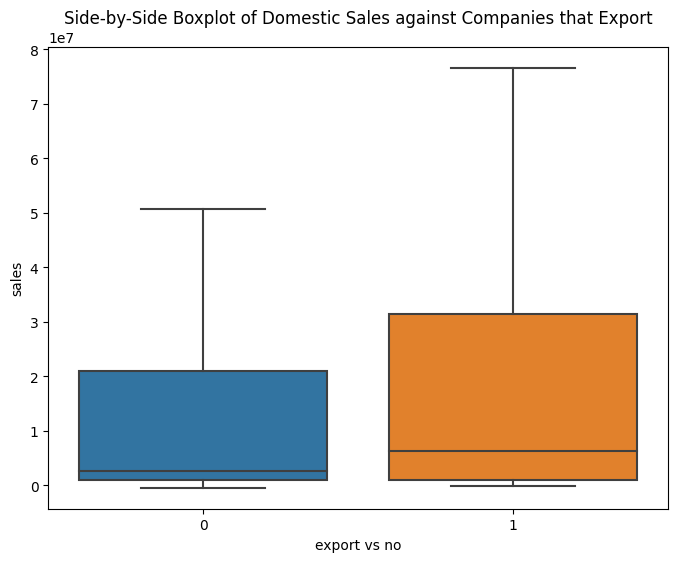

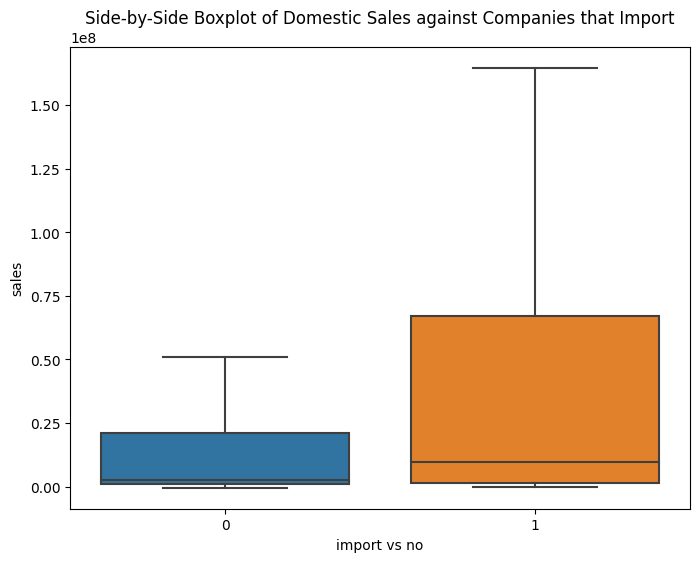

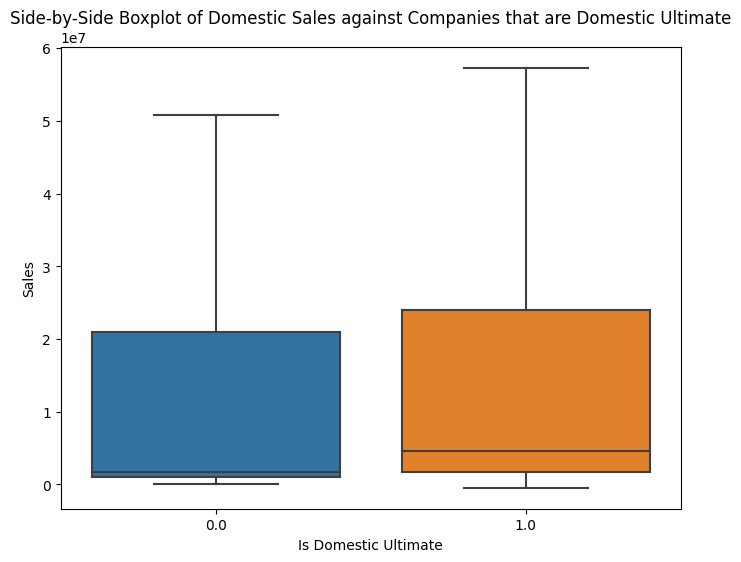

In [20]:


plt.figure(figsize=(8, 6)) 
sns.boxplot(x='Ownership Type_Private', y='Sales (Domestic Ultimate Total USD)', data=df2, showfliers = False) 
plt.xlabel('private vs public') 
plt.ylabel('sales') 
plt.title('Side-by-Side Boxplot of Domestic Sales against Private Ownership') 
plt.show() ###significant

plt.figure(figsize=(8, 6)) 
sns.boxplot(x='Ownership Type_Public', y='Sales (Domestic Ultimate Total USD)', data=df2, showfliers = False) 
plt.xlabel('private vs public') 
plt.ylabel('sales') 
plt.title('Side-by-Side Boxplot of Domestic Sales against Public Ownership') 
plt.show() ###significant
 
plt.figure(figsize=(8, 6)) 
sns.boxplot(x='Import/Export Status_Both Imports & Exports', y='Sales (Domestic Ultimate Total USD)', data=df2, showfliers = False) 
plt.xlabel('both vs nonboth') 
plt.ylabel('sales') 
plt.title('Side-by-Side Boxplot of Domestic Sales against Companies that Import and Export') 
plt.show() ###significant 
 
 
plt.figure(figsize=(8, 6)) 
sns.boxplot(x='Import/Export Status_Exports', y='Sales (Domestic Ultimate Total USD)', data=df2, showfliers = False) 
plt.xlabel('export vs no') 
plt.ylabel('sales') 
plt.title('Side-by-Side Boxplot of Domestic Sales against Companies that Export') 
plt.show() ####significant 
 
 
plt.figure(figsize=(8, 6)) 
sns.boxplot(x='Import/Export Status_Imports', y='Sales (Domestic Ultimate Total USD)', data=df2, showfliers = False) 
plt.xlabel('import vs no') 
plt.ylabel('sales') 
plt.title('Side-by-Side Boxplot of Domestic Sales against Companies that Import') 
plt.show() #####significant

plt.figure(figsize=(8, 6)) 
sns.boxplot(x='Is Domestic Ultimate', y='Sales (Domestic Ultimate Total USD)', data=df2, showfliers = False) 
plt.xlabel('Is Domestic Ultimate') 
plt.ylabel('Sales') 
plt.title('Side-by-Side Boxplot of Domestic Sales against Companies that are Domestic Ultimate') 
plt.show()




# Gradient Boosting Regressor

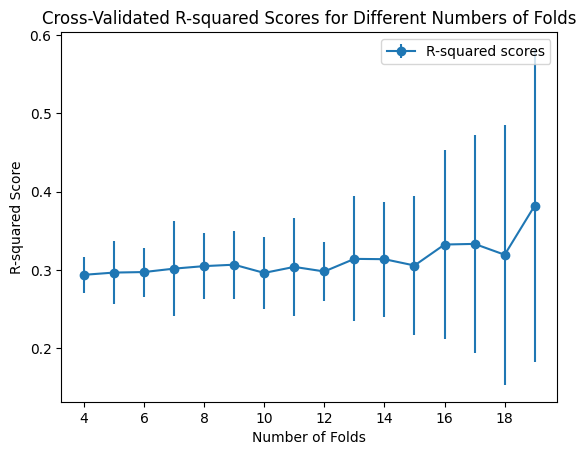

In [21]:


# Separate features and target variable
df3 = df2.dropna()
X = df3.drop('Sales (Domestic Ultimate Total USD)', axis=1)
y = df3['Sales (Domestic Ultimate Total USD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

# Lists to store results
n_folds_values = list(range(4, 20))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()
# Choose N = 16 due to time complexity and optimal variance.

In [22]:
# Use k-fold cross-validation with 16 folds
model_16 = GradientBoostingRegressor(random_state=42)
kf = KFold(n_splits=16, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_16.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_16.score(X_test, y_test)
print("Test R-squared score:", test_score)

Cross-Validation R-squared scores: [0.1742334  0.56801159 0.24674019 0.33124428 0.45231034 0.27480504
 0.36951091 0.22874133 0.28013132 0.32788511 0.64494848 0.30725588
 0.30012465 0.25179584 0.29230231 0.26746052]
Mean R-squared score: 0.3323438249127437
Standard Deviation of R-squared scores: 0.12044741072830735
Test R-squared score: 0.30740039338362246


# Linear Regression

In [23]:

# Use k-fold cross-validation with 16 folds
model_LR = LinearRegression()
kf = KFold(n_splits=16, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores_LR = cross_val_score(model_LR, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores_LR)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores_LR.mean())
print("Standard Deviation of R-squared scores:", cv_scores_LR.std())


Cross-Validation R-squared scores: [-0.00706411  0.04261347  0.00643628  0.0155034   0.0295796   0.00256394
  0.03535527  0.00080048  0.01014396  0.01333862  0.07898307  0.01607561
  0.01673704  0.00748415  0.02053037  0.00522723]
Mean R-squared score: 0.018394274323979685
Standard Deviation of R-squared scores: 0.020044785784585104


# Neural Network

In [24]:
# Assuming X and y are your features and target variable
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_NN)
X_test_scaled = scaler.transform(X_test_NN)

model_NN = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500, learning_rate='adaptive', learning_rate_init=0.001, random_state=42)
model_NN.fit(X_train_scaled, y_train_NN)

y_pred_NN = model_NN.predict(X_test_scaled)

mse_NN = mean_squared_error(y_test_NN, y_pred_NN)
r2_NN = r2_score(y_test_NN, y_pred_NN)

print(f"Mean Squared Error: {mse_NN}")
print(f"R-squared: {r2_NN}")


Mean Squared Error: 1.149403852931073e+20
R-squared: 0.005982201046607516


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Random Forest

In [25]:


# Instantiate RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

# Make predictions
forest_predictions = forest_model.predict(X_test)

# Calculate Mean Squared Error
forest_mse = mean_squared_error(y_test, forest_predictions)
print(forest_mse)

# Calculate R-squared
forest_r2 = r2_score(y_test, forest_predictions)
print(forest_r2)

1.1453116165780845e+20
0.009521214563937841


In [36]:
def testing_hidden_data():
   inputs = [] 
   variables = ["the latitude", "the longitude", "the account ID", "the company name", "the SIC code", "the Industry","the 8-digit SIC code","the 8-digit SIC description", "the year found", "the entity type", "the parent company", "the parent country", "ownership type", "the company description", "the square footage", "the company status (Active/Inactive)", "the employees at single location", "the domestic employees", "the global employees", "the global sales", "the import/export status", "the end of the fiscal year", "the global ultimate company", "the global ultimate country", "the domestic ultimate company", "whether the company is domestic ultimate", "whether the company is global ultimate", "any other arguments"] 
   for count in range(28): 
      user_input = input(f"Enter {variables[count]}") 
      inputs.append(user_input) 
   X_testpoint = [inputs[4],inputs[8],inputs[17],inputs[19],inputs[25],inputs[26],0,0,0,0,0]
   if inputs[12] == "Private":
      X_testpoint[6] = 1
   elif inputs[12] == "Public":
      X_testpoint[7] = 1
   if inputs[20] == "Both Imports & Exports":
      X_testpoint[8] = 1
   elif inputs[20] == "Exports":
      X_testpoint[9] = 1
   elif inputs[20] == "Imports":
      X_testpoint[10] = 1
   filtered_rows = df5.query("`SIC Code` == @inputs[4]")
   selected_index = filtered_rows.index[0]
   df6_SIC_Code = df6["SIC Code"]
   X_testpoint[0] = df6_SIC_Code[selected_index]

   test_point_list = [X_testpoint]
   prediction = model_16.predict(test_point_list)
   print(prediction)

